In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/Users/saide/Desktop/study/python_upskill/ml_algorithms/data.csv')
df.head()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [5]:
df = df.replace("?", np.nan)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0


In [6]:
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    float64
 4   chol        271 non-null    float64
 5   fbs         286 non-null    float64
 6   restecg     293 non-null    float64
 7   thalach     293 non-null    float64
 8   exang       293 non-null    float64
 9   oldpeak     294 non-null    float64
 10  slope       104 non-null    float64
 11  ca          3 non-null      float64
 12  thal        28 non-null     float64
 13  num         294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [7]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [8]:
df = df.drop(columns=['slope', 'ca', 'thal'])
df.isnull().sum()

age            0
sex            0
cp             0
trestbps       1
chol          23
fbs            8
restecg        1
thalach        1
exang          1
oldpeak        0
num            0
dtype: int64

In [9]:
df = df.fillna(df.median())
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64

In [10]:
[col for col in df.columns if 'num' in col.lower()]

['num       ']

In [11]:
X = df.drop(columns=['num       '])   # all features
y = df['num       ']   

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
class DecisionStump:
    def __init__(self):
        self.feature_index=None
        self.threshold=None
        self.left_value=None
        self.right_value=None
    def fit(self, X, residuals):
        n_samples, n_features=X.shape
        best_error=float("inf")
        for feature in range(n_features):
            thresholds=np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask=X[:, feature]<=threshold
                right_mask=X[:, feature]> threshold
                if np.sum(left_mask)==0 or np.sum(right_mask)==0:
                    continue
                left_value=np.mean(residuals[left_mask])
                right_value=np.mean(residuals[right_mask])
                preds=np.zeros_like(residuals)
                preds[left_mask]=left_value
                preds[right_mask]=right_value
                error=np.mean((residuals-preds)**2)
                if error < best_error:
                        best_error = error
                        self.feature_index = feature
                        self.threshold = threshold
                        self.left_value = left_value
                        self.right_value = right_value
        
    def predict(self, X):
        preds=np.zeros(X.shape[0])
        left_mask=X[:, self.feature_index] <= self.threshold
        right_mask = X[:, self.feature_index] > self.threshold
        preds[left_mask] = self.left_value
        preds[right_mask] = self.right_value
        return preds

In [27]:
class GradientBoostingClassifierScratch:
    def __init__(self, n_estimators=50, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.init_pred = None
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    def fit(self, X, y):
        pos_ratio = np.mean(y)
        self.init_pred = np.log(pos_ratio / (1 - pos_ratio))
        F = np.full(len(y), self.init_pred)
        for _ in range(self.n_estimators):
            p = self.sigmoid(F)
            residuals = y - p
            stump = DecisionStump()
            stump.fit(X, residuals)
            update = stump.predict(X)
            F += self.learning_rate * update
            self.models.append(stump)
    def predict_proba(self, X):
        F = np.full(X.shape[0], self.init_pred)
        for stump in self.models:
            F += self.learning_rate * stump.predict(X)
        probs = self.sigmoid(F)
        return probs
    def predict(self, X):
        probs = self.predict_proba(X)
        return np.array([1 if p >= 0.5 else 0 for p in probs])

In [28]:
gb = GradientBoostingClassifierScratch(n_estimators=100, learning_rate=0.1)
gb.fit(X_train_scaled, y_train.values)
y_pred_gb = gb.predict(X_test_scaled)
y_prob_gb = gb.predict_proba(X_test_scaled)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))

Accuracy: 0.8135593220338984
Precision: 0.7777777777777778
Recall: 0.6666666666666666
F1 Score: 0.717948717948718


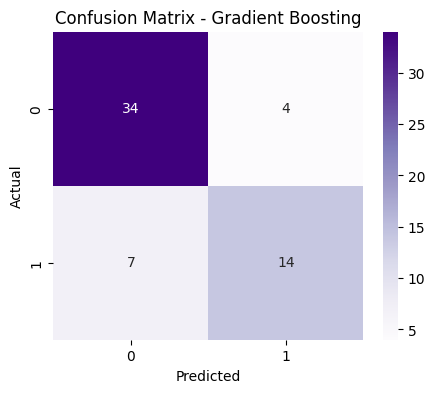

In [30]:
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

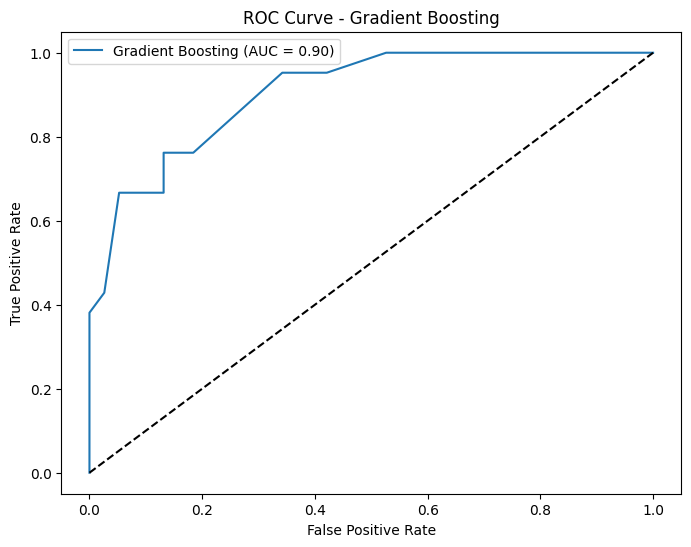

In [31]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.show()